<a href="https://colab.research.google.com/github/c2lv/colab/blob/main/_2_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%88%98%EC%A7%91_%EB%B0%8F_%ED%82%A4%EC%9B%8C%EB%93%9C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 수집 및 키워드 분석

- 출처: 텍스트 수집 및 키워드 분석 한번에 끝내기 - 이수안컴퓨터연구소

- [Youtube](https://youtu.be/RgKzmJQf21s)  
- [Colab](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbDUzb3BEQW9URGtIZDdJelQwMmk4S0EyT3F3Z3xBQ3Jtc0tuZmMwcTVfSS1WWTh6SHBrcUlVVDgyYUFjR2w4XzA4ZGRueUc1dTktWTJKYkZoUDdqdjJXckZ1Q0hHbG5rdm9tNDI2VzhHNk5hUEpldEVXQXpkMk5MTGxsM1N0QXlHb0tfSzNrTjhQVW5oWWNFUWpMTQ&q=https%3A%2F%2Fcolab.research.google.com%2Fdrive%2F1Ui1K89IYudZ47SpdJ3OIHX0Bapn7qx6S%3Fusp%3Dsharing&v=RgKzmJQf21s)

일부 내용 수정 및 추가

- 함수 기본 개념

In [ ]:
# 함수 예제
def add(a, b): # a, b는 파라미터
  return a + b # 리턴값

add(b=3, a=5) # 3, 5는 argument

8

## 한글 폰트 설정

* 하단 셀 실행 후 런타임 재시작 필요
- [관련 글 링크](https://teddylee777.github.io/colab/colab-korean)

In [6]:
# 나눔 폰트 설치 (Nanum)
import matplotlib as mpl # mpl이라는 이름으로 matplotlib 불러오기 
import matplotlib.pyplot as plt # plt라는 이름으로 matplotlib의 pyplot 불러오기
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina' # '%config' 뒤의 터미널 명령어를 실행. 환경 변수 InlineBackend.figure_format의 값을 'retina'로 설정
# 글씨가 흐릿하게 보이는 현상을 막기 위함.
# Ref. https://m.boostcourse.org/ds112/lecture/60074

# '!' 뒤의 터미널 명령어를 실행
!apt -qq -y install fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/

In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 폰트 저장 경로
fontname = fm.FontProperties(fname=fontpath, size=10).get_name() # 폰트 이름 얻어오기
# mpl.rc('font', family=fontname) 
# plt.rc('font', family='NanumBarunGothic') 
plt.rc('font', family=fontname) 
mpl.font_manager._rebuild()

## 한국어 형태소 분석기 설치

* 한국어 자연어 처리 konlpy 라이브러리
* 형태소 분석기 MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

In [2]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines() # raw에 텍스트 파일을 한 줄씩 저장
print(raw[:5]) # raw에 저장된 첫 줄부터 5번째 줄까지 리스트로 출력, 문자열 앞에 붙는 b는 byte 문자열을 뜻함.
# 숫자와 영어는 1byte이므로 그대로 출력되지만 한글은 3byte라서, 탭 문자와 개행 문자 등은 별도의 표기법이 있어서 일반적인 방식으로 표기되지 않는다.

# Ref. 사람이 읽기 힘든 byte 문자열로 저장된 이유
# https://wikidocs.net/10501

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

## 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

### 네이버 영화 리뷰 데이터

- [인덱싱과 슬라이싱](https://wikidocs.net/2838)

**반복문**  
- 반복문에 사용되는 키워드로는 for, while, in, cotinue, break 등이 있다.  
for문의 기본 구조는 다음과 같다.

```
for 변수 in 리스트(또는 튜플, 문자열):
    수행할 문장1
    수행할 문장2
```
- 리스트나 튜플, 문자열의 첫 번째 요소부터 마지막 요소까지 차례로 변수에 대입되어 "수행할 문장1", "수행할 문장2" 등이 수행된다.
- in 뒤에는 iterable 객체가 요구된다.  
대표적으로 iterable한 타입에는 list, dict, set, str, bytes, tuple, range가 있다. ([참고 링크](https://wikidocs.net/16068))

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용한다.

* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [3]:
raw = [x.decode() for x in raw[1:]] # 첫 줄은 제목줄이므로 생략하고 raw에 저장된 두번째 줄부터 마지막 줄까지 인간이 읽을 수 있도록 decode하여 raw에 다시 저장

reviews = [] # reviews라는 빈 리스트 생성
for i in raw: # raw에 있는 모든 저장된 줄을 두 번째 줄부터 마지막 줄까지 순서대로 i라는 변수에 저장하여 아래 명령을 수행
  reviews.append(i.split('\t')[1]) # i에 저장된 줄을 탭 문자로 구분하여 나누면 첫 번째 인덱스 값은 항상 document(리뷰)만 남게 됨. 리뷰를 reviews에 저장

print(reviews[:5]) # reviews에 저장된 첫 줄부터 5번째 줄까지 리스트로 출력 

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


### 형태소 분석을 이용한 명사 추출


- konlpy 설치

In [4]:
# Ref. konlpy, Mecab 형태소 분석기 설치 스크립트 실행 
# https://teddylee777.github.io/colab/colab-mecab
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-01-21 11:04:56--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-01-21 11:04:57--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce31a8a93eb2619581c720f7607.dl.dropboxusercontent.com/cd/0/get/B0-bq5xkWYAyxs73jbDh8GvKRJuKYUAd9YoEC-cWsHwktC_uXiCUspaV8umJ1eZF8BGRX1U4nGVudl53WLggXLjyOelLvSCu1SCDQNPiS6BMyHJ3WUSNQFno5o3klK6n0jNRUtQTj8sgg1eMeXXrH2DDBCV8e1PtagObdq_IGI1OfErRy3vStFPUOLW1RBH4pLU/file?dl=1# [following]
--2023-01-21 11:04:57--  https://uce31a8a93eb2619581c720f7607.dl.dropboxusercontent.com/cd/0/get/B0-bq5xkWYAy

* 형태소 분석기 Mecab으로 명사만 추출

In [5]:
from konlpy.tag import Mecab
tagger = Mecab()

reviews_nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    reviews_nouns.append(noun)

reviews_nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

#### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [12]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데'
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '후', '이', '애', '씨', '속', '뿐', '밋', '그', '급', 'ㄷ', '데']


#### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [13]:
reviews_nouns = []

for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words: # stop_words(불용어) 안에 추출된 명사가 없으면
      reviews_nouns.append(noun)

reviews_nouns[:10]

['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '우리', '나라']

### 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [14]:
from collections import Counter

reviews_nouns_counter = Counter(reviews_nouns)
top_reviews_nouns = dict(reviews_nouns_counter.most_common(100))
print(top_reviews_nouns)

{'연기': 9175, '최고': 8813, '평점': 8514, '스토리': 7163, '생각': 6943, '드라마': 6896, '사람': 6742, '감동': 6489, '배우': 5893, '내용': 5731, '감독': 5629, '재미': 5479, '시간': 5320, '년': 4936, '사랑': 4741, '쓰레기': 4585, '작품': 3985, '하나': 3923, '정도': 3656, '이건': 3650, '마지막': 3647, '액션': 3568, '기대': 3465, '장면': 3262, '이게': 3046, '편': 3044, '최악': 3019, '돈': 2980, '이야기': 2947, '이해': 2745, '명작': 2685, '여자': 2678, '이상': 2676, '처음': 2673, '한국': 2640, '주인공': 2553, '우리': 2531, '연출': 2376, '때문': 2371, '기억': 2364, '현실': 2193, '마음': 2128, '굿': 2110, '남자': 2078, '결말': 2066, '인생': 2060, '공포': 2048, '전개': 2035, '짜증': 2011, '소재': 1999, '느낌': 1950, '필요': 1929, '일본': 1878, '반전': 1868, '수준': 1864, '음악': 1852, '매력': 1832, '가슴': 1817, '인간': 1811, '짱': 1809, '아이': 1749, '원작': 1705, '눈물': 1704, '코미디': 1598, '추천': 1579, '자체': 1558, '실망': 1557, '대박': 1495, '눈': 1484, '몰입': 1453, '캐릭터': 1440, '나라': 1409, '가족': 1401, '건지': 1397, '연기력': 1387, '여운': 1386, '시리즈': 1380, '모습': 1364, '뭔가': 1361, '표현': 1311, '극장': 1290, '공감': 1288, '이걸': 1264,

### 단어 빈도 시각화

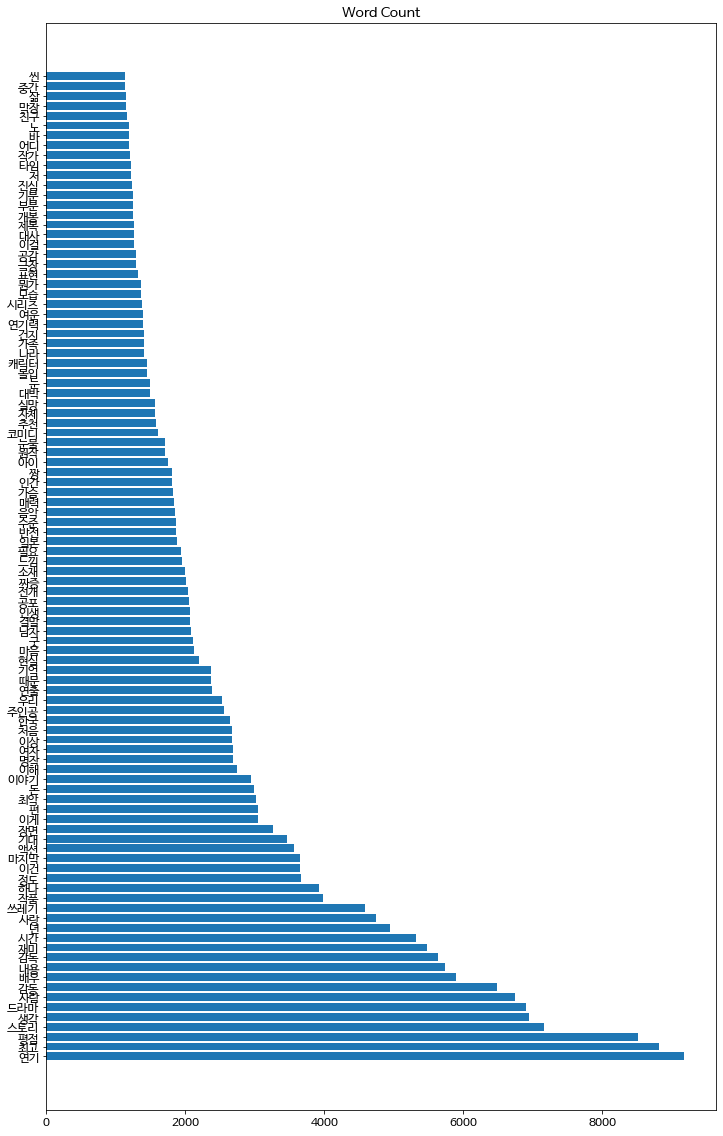

In [15]:
''' 나눔 글꼴 설치되어 있는지 확인 '''
# import matplotlib.font_manager
# font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# [matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
# print(font_list)
# print(mpl.rcParams['font.family']) # font
# print(mpl.rcParams['font.size']) # size

import numpy as np

plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_reviews_nouns))

plt.figure(figsize=(12, 20))
plt.barh(y_pos, top_reviews_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_reviews_nouns.keys())
plt.show()

### 트리맵(Treemap) 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [9]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


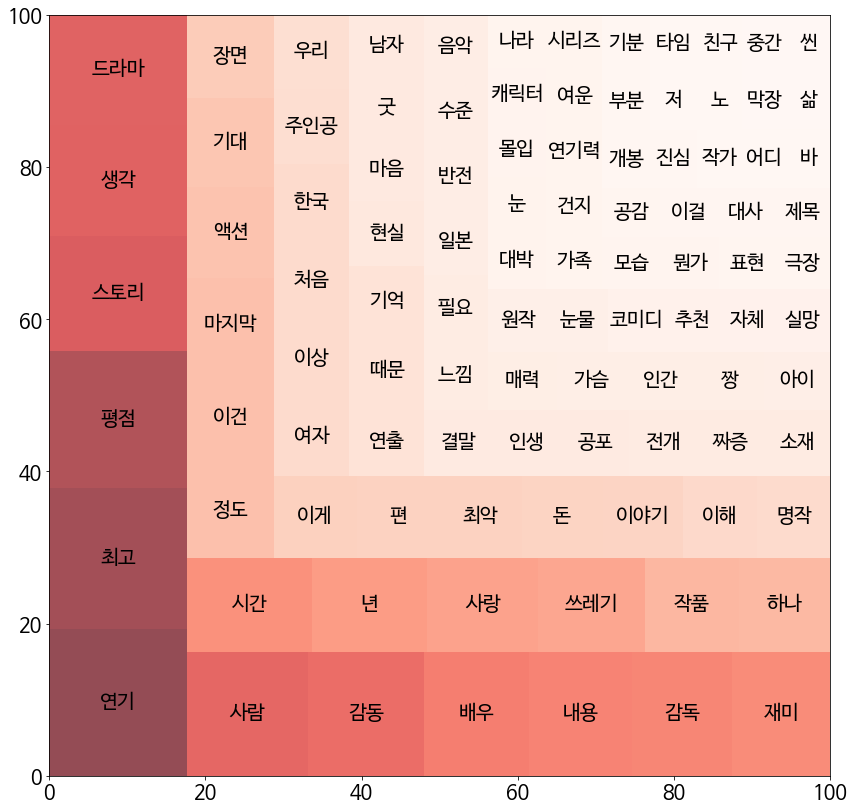

In [16]:
import squarify

plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_reviews_nouns.values()),
                            vmax = max(top_reviews_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_reviews_nouns.values()]

squarify.plot(label = top_reviews_nouns.keys(),
              sizes = top_reviews_nouns.values(),
              color = colors,
              alpha = .7)

### 워드클라우드(WordCloud) 시각화

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [17]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [18]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_reviews_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

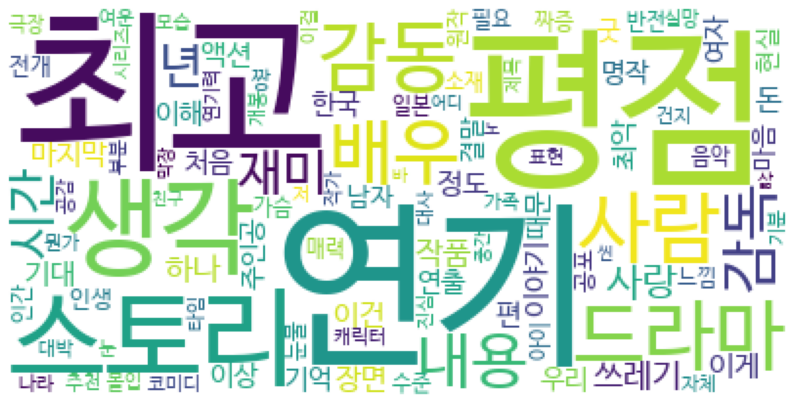

In [19]:
figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## 네이버 검색 API 서비스

### 네이버 서비스 API 신청

1. 네이버 개발자센터: https://developers.naver.com/
2. 어플리케이션 등록
3. 클라이언트 ID/SECRET 확인

### NAVER 서비스 API 종류

| 항목 | 주소                                         |
|------|----------------------------------------------|
|블로그| https://openapi.naver.com/v1/search/blog.json |
|뉴스　| https://openapi.naver.com/v1/search/news.json |
| 책　 | https://openapi.naver.com/v1/search/book.json|
| 성인 검색어 판별|　https://openapi.naver.com/v1/search/adult.json|
| 백과사전| https://openapi.naver.com/v1/search/encyc.json|
| 영화| https://openapi.naver.com/v1/search/movie.json|
| 카페글 |https://openapi.naver.com/v1/search/cafearticle.json|
| 지식in| https://openapi.naver.com/v1/search/kin.json|
| 지역 | https://openapi.naver.com/v1/search/local.json|
| 오타변환 | https://openapi.naver.com/v1/search/errata.json|
| 웹문서 | https://openapi.naver.com/v1/search/webkr.json|
| 이미지 | https://openapi.naver.com/v1/search/image.json|
| 쇼핑 | https://openapi.naver.com/v1/search/shop.json|
| 전문자료 | https://openapi.naver.com/v1/search/doc.json|

## 네이버 웹문서 키워드 분석

### 네이버 웹문서 검색 API

- client_id, client_secret은 [네이버 애플리케이션 등록 (API 이용신청)](https://developers.naver.com/apps/#/register)룰 통해 구하면 됩니다.  
- 사용 API는 검색, 비로그인 오픈 API 서비스 환경은 Android 설정, 안드로이드 앱 패키지 이름은 `com.example.애플리케이션_이름`으로 설정하여 등록하세요.  
- 등록이 완료되면, 내 애플리케이션에서 해당 애플리케이션 선택 - 애플리케이션 정보에서 두 개 값을 구할 수 있습니다.

In [23]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = '' # 입력
client_secret = '' # 입력

query = urllib.parse.quote(input('검색 질의: '))
idx = 0
display = 100
start = 1
end = 1000

web_df = pd.DataFrame(columns=('Title', 'Link', 'Description'))

for start_index in range(start, end, display):
  url = 'https://openapi.naver.com/v1/search/webkr?query=' + query \
        + '&display=' + str(display) + '&start=' + str(start_index)
  request = urllib.request.Request(url)
  request.add_header('X-Naver-Client-id', client_id)
  request.add_header('X-Naver-Client-Secret', client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if (rescode == 200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      web_df.loc[idx] = [title, link, description]
      idx += 1
  else:
    print('Error Code: ' + rescode)

web_df

검색 질의: 인공지능


,Title,Link,Description
0,인공지능 - 나무위키,https://namu.wiki/w/%EC%9D%B8%EA%B3%B5%EC%A7%8...,인공지능(人工知能) 또는 A.I.(Artificial Intelligence)는 일...
1,인공지능의 정의와 활용 방안 | SAS KOREA,https://www.sas.com/ko_kr/insights/analytics/w...,"SAS에서 인공지능(Artificial Intelligence)의 정의와 중요성, ..."
2,인공지능 - 해시넷,http://wiki.hash.kr/index.php/%EC%9D%B8%EA%B3%...,"인공지능(AI) 인공지능(人工知能, AI, artificial intelligenc..."
3,인공 지능(AI)이란? | 용어 해설 | HPE 대한민국,https://www.hpe.com/kr/ko/what-is/artificial-i...,AI(인공 지능)는 광범위하게 기계 또는 시스템이 하는 인간과 같은 모든 행동을 의...
4,인공지능 챗봇 상담 - 인공지능 로봇 소개 - AIA생명,https://www.aia.co.kr/ko/help-support/about-ai...,"인공지능 로봇과 대기 없는 실시간 상담 AIA생명의 새로운 서비스, 인공지능 로봇 ..."
...,...,...,...
145,광주인공지능사관학교,https://gj-aischool.or.kr/,나도 이제 AI 전문가! 광주인공지능사관학교
146,인공지능과 Singularity - Contenta M,https://magazine.contenta.co/2015/12/%EC%9D%B8...,인공지능이 특이점에 도달하게 되면 소위 지능폭발이 일어나게 됩니다. 원자폭탄이 순식...
147,브런치 키워드: 인공지능,https://brunch.co.kr/keyword/%EC%9D%B8%EA%B3%B...,리포트에 ChatGPT를 사용하면 표절인가? ChatGPT와 인간의 협력적 글쓰기최...
148,[김병필의 인공지능 개척시대] 인공지능 학습 데이터 전쟁 | 중앙일보,https://www.joongang.co.kr/article/25035642,인공지능 경쟁이 격화되면서 새로운 전장(戰場)으로 떠오르는 것이 바로 인공지능 학습...


In [26]:
web = []
for d in web_df.Description:
  web.append(d)

print(web[:5])

['인공지능(人工知能) 또는 A.I.(Artificial Intelligence)는 일반적으로 인간의 학습능력, 추론능력, 지각능력이 필요한 작업을 할 수 있도록 컴퓨터시스템을 구현하려는 컴퓨터과학의 세부분야 중 하나이다. 인간을 포함한 동물이 갖고 있는 지능 즉, natural intelligence와는 다른 개념이다.', 'SAS에서 인공지능(Artificial Intelligence)의 정의와 중요성, AI의 역사와 활용 방법에 대해서 알아 보실 수 있습니다.', '인공지능(AI) 인공지능(人工知能, AI, artificial intelligence)이란 인간처럼 학습하고 생각할 수 있는 컴퓨터 시스템을 말한다.', 'AI(인공 지능)는 광범위하게 기계 또는 시스템이 하는 인간과 같은 모든 행동을 의미합니다. AI의 기본 형식에서 컴퓨터는 과거의 유사한 행동 사례를 통해 얻은 광범위한 데이터를 사용하여 인간의 행동을 ‘모방’하도록 프로그래밍됩니다. | HPE 대한민국', '인공지능 로봇과 대기 없는 실시간 상담 AIA생명의 새로운 서비스, 인공지능 로봇 AIA ON과의 채팅 상담으로 간단한 문의사항을 빠르게 확인하세요. 상담 시작하기 인공지능 로봇 상담 서비스란 고객의 편의를... ']


### 형태소 분석을 이용한 명사 추출


#### 불용어 사전

불용어 예제: `인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번`

In [28]:
stop_words = '인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번'
stop_words = stop_words.split(' ')
print(stop_words)

['인공지능', '인공', '지능', '분야', '수', '것', '등', '기반', '일', '년', '말', '문', '월', '이', '명', '깨', '개', '중', '범', '부', '딥', '빅', '책', '분', '봉', '차', '나', '내', '전', '억', '대', '형', '선', '사', '폼', '원', '번']


In [29]:
tagger = Mecab()
web_nouns = []
for w in web:
  for noun in tagger.nouns(w):
    if noun not in stop_words:
      web_nouns.append(noun)

web_nouns[:10]

['人工', '知能', '일반', '인간', '학습', '능력', '추론', '능력', '지각', '능력']

### 단어 빈도수 측정

In [31]:
web_nouns_counter = Counter(web_nouns)
top_web_nouns = dict(web_nouns_counter.most_common(100))
print(top_web_nouns)

{'러닝': 27, '학습': 25, '기술': 24, '시스템': 22, '활용': 20, '방법': 19, '교육': 19, '데이터': 18, '소개': 18, '문제': 17, '인간': 16, '컴퓨터': 16, '관련': 16, '융합': 15, '학과': 15, '개념': 14, '자료': 14, '지식': 13, '콘텐츠': 13, '과학': 12, '기계': 12, '서비스': 12, '정보': 12, '수학': 12, '인식': 12, '미래': 12, '능력': 11, '제품': 11, '학창': 11, '필요': 10, '기본': 10, '로봇': 10, '솔루션': 10, '머신': 10, '이해': 10, '소프트웨어': 10, '대학교': 10, '개발': 10, '산업': 10, '신경망': 10, '발전': 10, '교사': 10, '시절': 10, '가능': 9, '연구': 9, '기업': 9, '추천': 9, '구글': 9, '지원': 9, '기초': 9, '사람': 9, '이론': 9, '과정': 9, '사용': 8, '상담': 8, '정리': 8, '센터': 8, '교수': 8, '우리': 8, '처리': 8, '경험': 8, '월드': 8, '중심': 8, '예측': 8, '실습': 8, '구현': 7, '확인': 7, '자동': 7, '국내': 7, '강화': 7, '인재': 7, '제공': 7, '해결': 7, '사업단': 7, '추론': 6, '생각': 6, '이유': 6, '스타': 6, '미디어': 6, '진화': 6, '뇌': 6, '법': 6, '챗': 6, '양성': 6, '사고': 6, '기능': 6, '삼성전자': 6, '취업': 6, '유아': 6, '시간': 6, '상품': 6, '장': 6, '수업': 6, '테스트': 6, '가스': 6, '이야기': 5, '이용': 5, '한국': 5, '협회': 5, '전체': 5}


### 단어 빈도 시각화

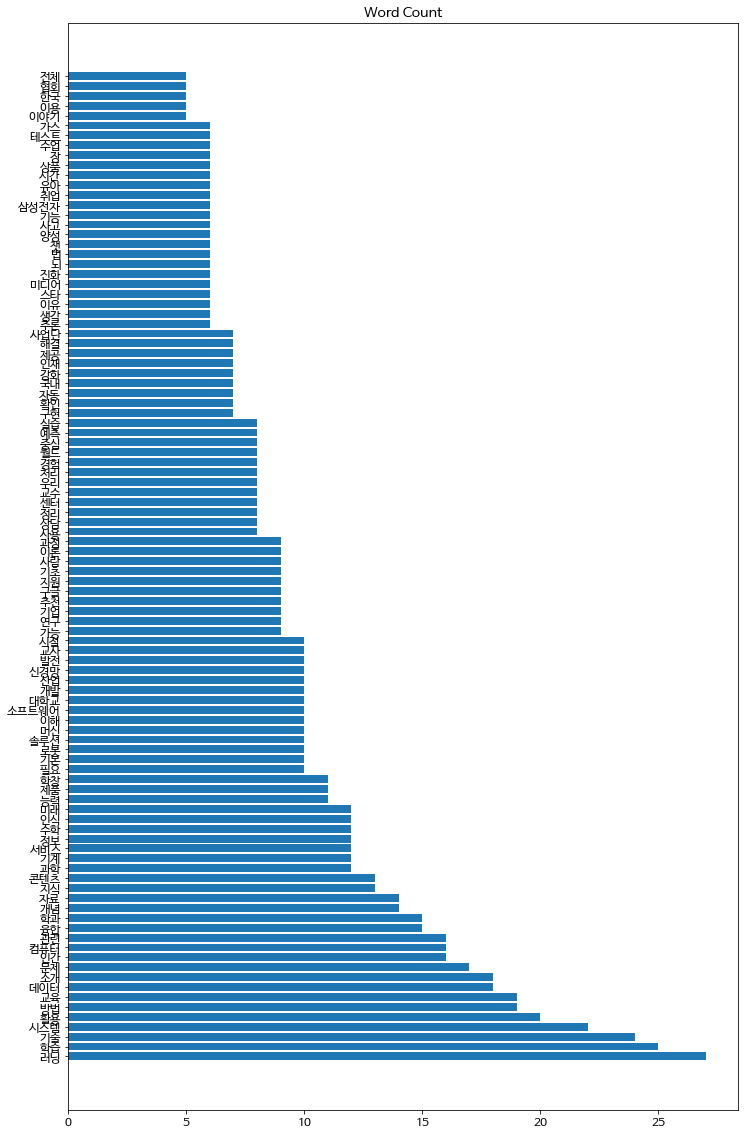

In [32]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_web_nouns))

plt.figure(figsize=(12, 20))
plt.barh(y_pos, top_web_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_web_nouns.keys())
plt.show()

### 트리맵 시각화

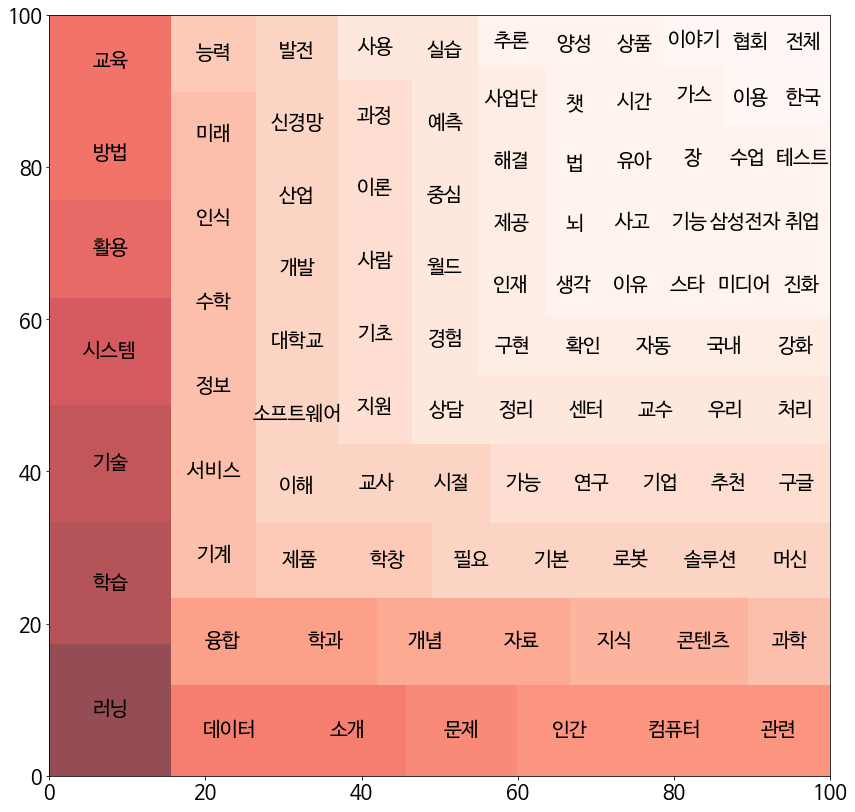

In [33]:
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_web_nouns.values()),
                            vmax = max(top_web_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_web_nouns.values()]

squarify.plot(label = top_web_nouns.keys(),
              sizes = top_web_nouns.values(),
              color = colors,
              alpha = .7)

### 워드클라우드 시각화

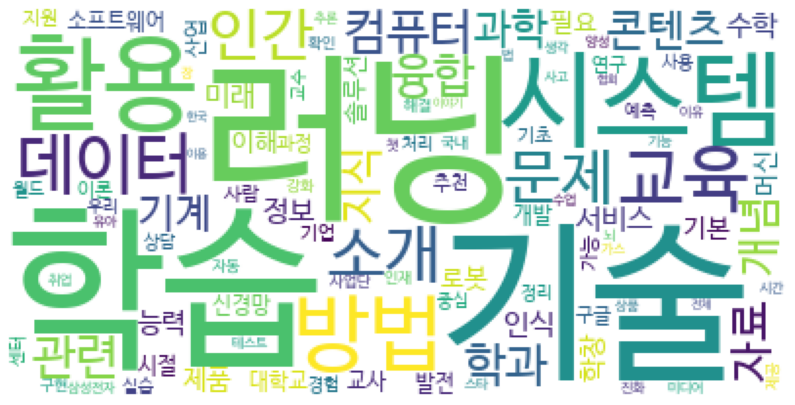

In [34]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_web_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## 네이버 뉴스 키워드 분석

### 네이버 뉴스 검색 API

In [39]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = '' # 입력 
client_secret = '' # 입력

query = urllib.parse.quote(input('검색 질의: '))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

news_df = pd.DataFrame(columns=('Title', 'Original Link', 'Link', 'Description', 'Publication Date'))

for start_index in range(start, end, display):
  url = 'https://openapi.naver.com/v1/search/news?query=' + query \
        + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort
  request = urllib.request.Request(url)
  request.add_header('X-Naver-Client-id', client_id)
  request.add_header('X-Naver-Client-Secret', client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if (rescode == 200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])
      original_link = items[item_index]['originallink']
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      pub_date = items[item_index]['pubDate']
      news_df.loc[idx] = [title, original_link, link, description, pub_date]
      idx += 1
  else:
    print('Error Code: ' + rescode)

news_df

검색 질의: 인공지능


,Title,Original Link,Link,Description,Publication Date
0,"구글, 라이벌 인공지능 챗GPT 부상하자 공동 창업자에 SOS",https://www.yna.co.kr/view/AKR2023012100550007...,https://n.news.naver.com/mnews/article/001/001...,"NYT &quot;피차이 CEO, 코드레드 발령…페이지·브린, AI회의 참석&quo...","Sat, 21 Jan 2023 04:41:00 +0900"
1,인공지능 챗GPT에게 ‘UAE의 주적’이 누구인지 물어봤다,https://www.seoul.co.kr/news/newsView.php?id=2...,https://n.news.naver.com/mnews/article/081/000...,그래서 주관적 판단은 배제하고 학습된 사실에 따라 판단한다는 인공지능(AI) 챗봇 ...,"Sat, 21 Jan 2023 11:02:00 +0900"
2,&apos;국방 무인·로봇·인공지능 학과&apos; 개설할 대학 2곳 모집,https://www.news1.kr/articles/4930577,https://n.news.naver.com/mnews/article/421/000...,"방사청은 올해 방산기업 석·박사급 연구인력 수요와 국방 신산업 현황 등을 고려, 주...","Fri, 20 Jan 2023 09:13:00 +0900"
3,"엔젤스윙, 어노테이션에이아이와‘드론-인공지능 기술 접목’ 업무협약 체결",https://www.mk.co.kr/article/10614614,https://n.news.naver.com/mnews/article/009/000...,국내 1위 드론 데이터 플랫폼 제공 기업 엔젤스윙(대표 박원녕)이 인공지능 전문기업...,"Fri, 20 Jan 2023 15:53:00 +0900"
4,"엔젤스윙, 어노테이션에이아이와 &apos;드론-인공지능 기술 접목&apos; 관련 ...",http://news.mt.co.kr/mtview.php?no=20230120100...,https://n.news.naver.com/mnews/article/008/000...,국내 드론 데이터 플랫폼 제공 기업 엔젤스윙(대표 박원녕)이 인공지능 전문기업 ㈜어...,"Fri, 20 Jan 2023 16:22:00 +0900"
...,...,...,...,...,...
995,대구시 유치한 &apos;인공지능분야 국제학술대회&apos; 성공했다,https://www.ajunews.com/view/20221222174750873,https://www.ajunews.com/view/20221222174750873,2023 비디오 신호처리 기반 보안 국제학술대회 아주경제=(대구) 이인수 기자 si...,"Thu, 22 Dec 2022 18:10:00 +0900"
996,"스마트시티 운영 시범 도시 ‘항저우’, 인공지능으로 업그레이드",http://www.boannews.com/media/view.asp?idx=112...,http://www.boannews.com/media/view.asp?idx=112...,정부 주도로 탄탄한 인공지능 산업 밸류체인 구축[보안뉴스 ] 중국의 최대 관광도시 ...,"Sun, 25 Dec 2022 23:56:00 +0900"
997,"워싱턴포스트, 인공지능(AI) 로봇 챗봇으로 숙제하는 미국 학생들...챗 GPT로...",https://www.lecturernews.com/news/articleView....,https://www.lecturernews.com/news/articleView....,[사진출처=연합뉴스] 연합뉴스에 따르면 워싱턴포스트(WP)가 미국의 교사들이 최근 ...,"Thu, 29 Dec 2022 05:16:00 +0900"
998,"한국IT직업전문학교 인공지능학과, 정시모집 기간 2023학년도 신입생 모집",https://www.ekn.kr/web/view.php?key=2023010401...,https://www.ekn.kr/web/view.php?key=2023010401...,"한 IT기업 관계자는 &quot;소프트웨어 고급인력 양성을 위해 인공지능, 소프트웨...","Wed, 04 Jan 2023 15:56:00 +0900"


In [40]:
news = []
for n in news_df.Title:
  news.append(n)

print(news[:5])

['구글, 라이벌 인공지능 챗GPT 부상하자 공동 창업자에 SOS', '인공지능 챗GPT에게 ‘UAE의 주적’이 누구인지 물어봤다', '&apos;국방 무인·로봇·인공지능 학과&apos; 개설할 대학 2곳 모집', '엔젤스윙, 어노테이션에이아이와‘드론-인공지능 기술 접목’ 업무협약 체결', '엔젤스윙, 어노테이션에이아이와 &apos;드론-인공지능 기술 접목&apos; 관련 업무협약']


### 형태소 분석을 이용한 명사 추출


In [41]:
tagger = Mecab()
news_nouns = []
for n in news:
  for noun in tagger.nouns(n):
    if noun not in stop_words:
      news_nouns.append(noun)

news_nouns[:10]

['구글', '라이벌', '챗', '부상', '공동', '창업자', '챗', '주적', '누구', '국방']

### 단어 빈도수 측정

In [42]:
news_nouns_counter = Counter(news_nouns)
top_news_nouns = dict(news_nouns_counter.most_common(100))
print(top_news_nouns)

{'교육': 111, '개발': 92, '기술': 72, '데이터': 59, '챗': 57, '광주': 56, '시스템': 53, '로봇': 51, '모집': 45, '봇': 45, '활용': 43, '기업': 43, '학교': 36, '솔루션': 36, '구축': 34, '미래': 33, '국민카드': 32, '마케팅': 32, '협약': 31, '산업': 31, '서비스': 31, '광주시': 31, '융합': 30, '발명자': 30, '병원': 29, '판독': 28, '연구소': 28, '스타트업': 27, '도입': 26, '의료': 26, '연구': 26, '대학': 25, '팀': 25, '디지털': 25, '모델': 25, '사업': 25, '업무': 24, '사관': 24, '실리콘밸리': 24, '반도체': 24, '임': 23, '즈': 23, '인식': 23, '관리': 23, '메타': 23, '스마트': 22, '시대': 22, '진출': 22, '강화': 22, '정보': 21, '공개': 21, '지원': 21, '올해': 21, '버스': 21, '캠프': 20, '한국': 20, '협회': 20, '오픈': 20, '도시': 20, '교수': 20, '협력': 19, '개최': 19, '예술': 19, '혁신': 19, '최초': 19, '학과': 18, '세계': 18, '처리': 18, '방역': 18, '운영': 18, '검사': 17, '예측': 17, '학습': 17, '위': 17, '선정': 17, '안저': 16, '보건소': 16, '투자': 16, '케어': 16, '뉴스': 16, '한자': 16, '단국': 16, '재난': 16, '특허청': 16, '논문': 16, '구글': 15, '체결': 15, '완료': 15, '추진': 15, '충북': 15, '경기': 15, '한국어': 15, '한문': 15, '전문': 14, '실시': 14, '주': 14, '구현': 14, '미국': 14, '대회'

### 단어 빈도 시각화

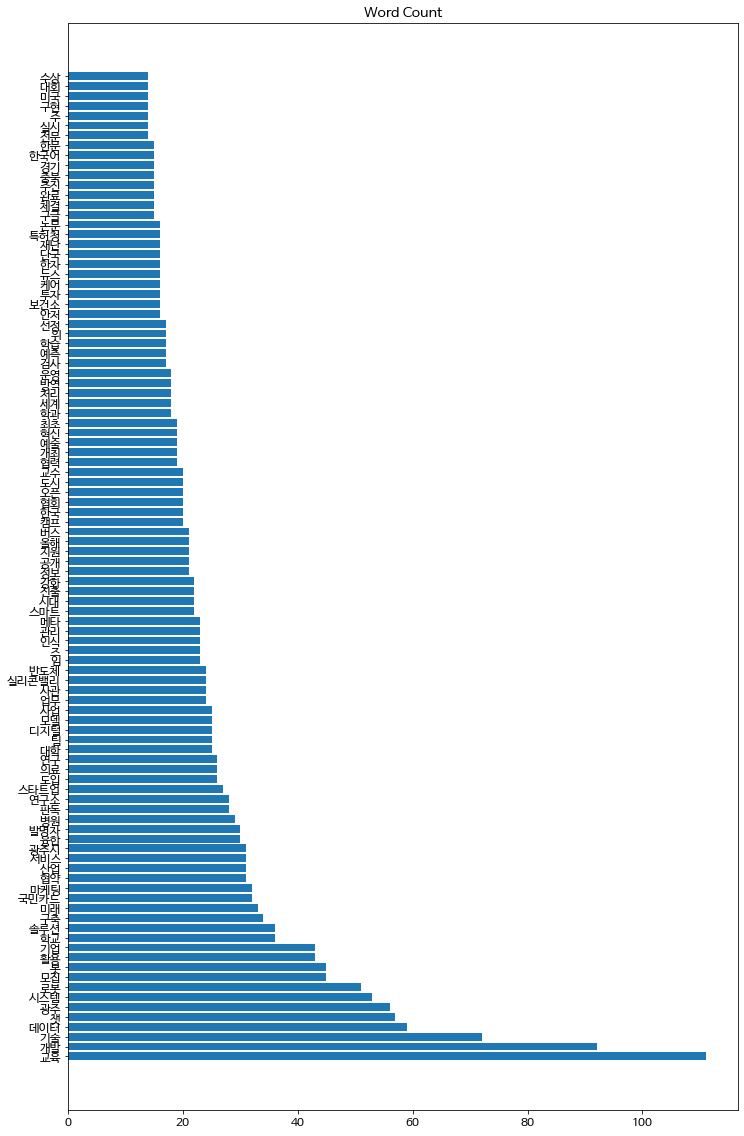

In [43]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_news_nouns))

plt.figure(figsize=(12, 20))
plt.barh(y_pos, top_news_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_news_nouns.keys())
plt.show()

### 트리맵 시각화

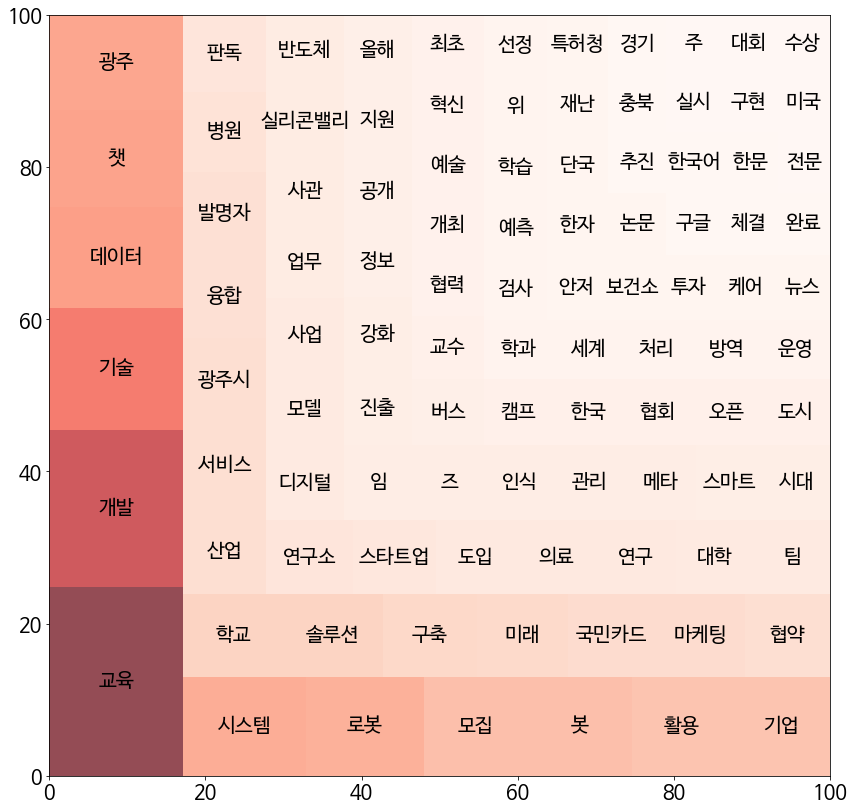

In [44]:
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_news_nouns.values()),
                            vmax = max(top_news_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_news_nouns.values()]

squarify.plot(label = top_news_nouns.keys(),
              sizes = top_news_nouns.values(),
              color = colors,
              alpha = .7)

### 워드클라우드 시각화

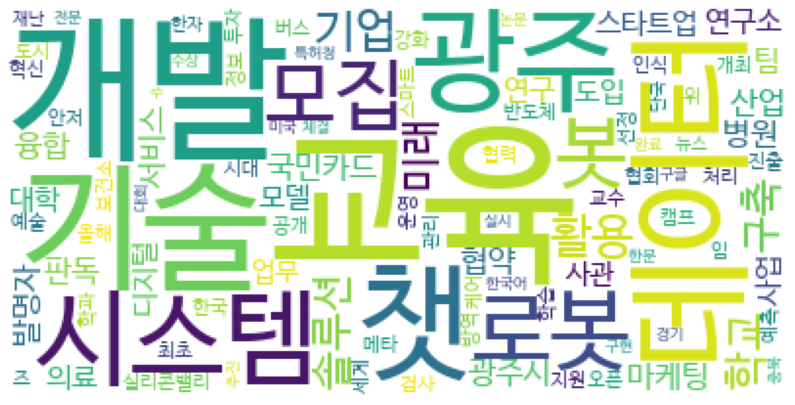

In [46]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_news_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## 네이버 블로그 키워드 분석

### 네이버 블로그 검색 API

In [52]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = '' # 입력
client_secret = '' # 입력

query = urllib.parse.quote(input('검색 질의: '))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

blog_df = pd.DataFrame(columns=('Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link'))

for start_index in range(start, end, display):
  url = 'https://openapi.naver.com/v1/search/blog?query=' + query \
        + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort
  request = urllib.request.Request(url)
  request.add_header('X-Naver-Client-id', client_id)
  request.add_header('X-Naver-Client-Secret', client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if (rescode == 200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      blogger_name = items[item_index]['bloggername']
      blogger_link = items[item_index]['bloggerlink']
      blog_df.loc[idx] = [title, link, description, blogger_name, blogger_link]
      idx += 1
  else:
    print('Error Code: ' + rescode)

blog_df

검색 질의: 인공지능


,Title,Link,Description,Blogger Name,Blogger Link
0,메타버스 지능형 로봇 인공지능 AI 관련주 위세아이텍...,https://blog.naver.com/rec1820/222989718040,"메타버스 지능형 로봇 인공지능 AI 관련주 위세아이텍 (065370), 코난테크놀로...",JC`Enjoy the Life,blog.naver.com/rec1820
1,AI학과 인공지능을 배우는 학교,https://blog.naver.com/dhdutk2014/222986766362,2년 전 가천대학교에서 최초로 인공지능학과인 AI학과를 신설했습니다. 그 당시만 하...,♥ 좋은 생각 ♥,blog.naver.com/dhdutk2014
2,[펀드근황체크] [한화글로벌메가트렌드EMP펀드] 인공지능부...,https://blog.naver.com/hanwhaasset/222989785201,"대만의 경우, 최근 인공지능 기술을 활용한 군사용 드론을 개발하기 위한 연구개발센터...",한화자산운용 공식 블로그,blog.naver.com/hanwhaasset
3,인공지능 스피커 셋톱박스 요약(SK KT LG U플러스...,https://blog.naver.com/kevokevo/222981710262,인공지능 스피커 셋톱박스 요약(SK KT LG U플러스 기가지니3 A 누구(NUGU...,COA,blog.naver.com/kevokevo
4,"키워드 - 인플레이션, 경기침체, 인력감축 그리고 인공지능",https://blog.naver.com/simon9627/222987680438,키워드를 #인플레이션 #경기침체 #인력감축 #인공지능 등으로 발표하였습니다. htt...,스마트메이커,blog.naver.com/simon9627
...,...,...,...,...,...
995,"인공지능 죽전 헬스장, 죽전PT샵 밀론부티크 _짧은 시간에...",https://blog.naver.com/eyeslock1/222858370353,헬스장에 인공지능이 적용되면 어떨지 상상만 하지말고 직접 느껴보자. AI 인공지능 ...,북북 중고책방,blog.naver.com/eyeslock1
996,전기차 인공지능 전기부족,https://blog.naver.com/zendoclab/222985266049,"인공지능, 메타버스, 자율주행/로봇/드론 2023년 현재는 코로나19의 여파로부터 ...",젠닥,blog.naver.com/zendoclab
997,성경과 우주관(3) 인공지능과 뇌,https://blog.naver.com/godinus123/222713954725,성경과 우주관(3) - 뇌와 매트릭스 그리고 인공지능의 유사성 요즘 인공지능이 산업...,사랑과생각,blog.naver.com/godinus123
998,갤럭시 통화녹음 간편한 인공지능 무료 앱 비토!,https://blog.naver.com/ideungam/222885753766,바로 발달한 AI 기술을 활용하여 음성을 텍스트로 자동 변환해 주는 비토 VITO ...,게임앤리뷰,blog.naver.com/ideungam


In [53]:
blog = []
for b in blog_df.Description:
  blog.append(b)

print(blog[:5])

['메타버스 지능형 로봇 인공지능 AI 관련주 위세아이텍 (065370), 코난테크놀로지 (402030), 자이언트스텝 (289220), 알체라 (347860), 셀바스AI (108860), 가온미디어 (078890), 솔트룩스 (304100) 등의... ', '2년 전 가천대학교에서 최초로 인공지능학과인 AI학과를 신설했습니다. 그 당시만 하더라도 처음... 주변에서 이제는 심심치 않게 인간 대신에 로봇 또는 인공지능을 기반으로 제품이 자체적으로 운영되고 있는... ', '대만의 경우, 최근 인공지능 기술을 활용한 군사용 드론을 개발하기 위한 연구개발센터를 자이현에... 마지막 4번째 트렌드는 ‘인공지능’ 입니다. 기술 테마도 간과하면 안되는 메가트렌드인데요. 최근... ', '인공지능 스피커 셋톱박스 요약(SK KT LG U플러스 기가지니3 A 누구(NUGU) 클로바AI) 인터넷 tv가 필수인 시대, 요즘은 인터넷을 새로 가입하거나 재약정을 하면 인공지능 스피커 셋톱박스로 신청을 할 수... ', '키워드를 #인플레이션 #경기침체 #인력감축 #인공지능 등으로 발표하였습니다. https://www.visualcapitalist.... 인공지능 인력감축의 영향에는 #인공지능 기술 발달도 어느정도 영향을 미칠 것으로 보입니다. 이미... ']


### 형태소 분석을 이용한 명사 추출


In [55]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_words:
      blog_nouns.append(noun)

blog_nouns[:10]

['메타', '버스', '로봇', '관련', '주', '위세', '아이', '텍', '코난', '테크놀로지']

### 단어 빈도수 측정

In [57]:
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
print(top_blog_nouns)

{'기술': 277, '데이터': 176, '교육': 154, '활용': 131, '인간': 117, '관련': 110, '로봇': 108, '학습': 106, '산업': 100, '서비스': 93, '그림': 89, '개발': 85, '시대': 85, '사람': 84, '정보': 77, '봇': 75, '챗': 71, '기업': 71, '코딩': 70, '미래': 69, '발전': 66, '우리': 66, '러닝': 65, '생각': 65, '과학': 61, '사용': 60, '최근': 59, '학교': 59, '시스템': 57, '보청기': 57, '프로그램': 55, '연구': 54, '소개': 52, '진행': 51, '소프트웨어': 50, '이번': 50, '디지털': 49, '광주': 47, '시작': 47, '과정': 45, '인식': 44, '수업': 44, '학과': 42, '가능': 42, '분석': 42, '컴퓨터': 42, '관심': 41, '강의': 41, '능력': 41, '아이': 40, '시간': 40, '주': 39, '이미지': 39, '학생': 39, '지원': 39, '사회': 39, '기능': 37, '대화': 37, '스마트': 37, '버스': 35, '영상': 35, '때': 35, '대회': 35, '오늘': 35, '전문': 35, '메타': 34, '구글': 34, '내용': 34, '대학교': 33, '운영': 33, '필요': 33, '이야기': 33, '신경망': 33, '자동': 32, '세상': 32, '제품': 31, '플랫': 31, '기계': 31, '문제': 31, '이용': 30, '융합': 30, '저': 29, '전문가': 29, '혁명': 29, '사업': 29, '머신': 29, '직업': 29, '음성': 29, '인터넷': 28, '알고리즘': 28, '국내': 28, '제공': 28, '사관': 28, '주인공': 28, '세계': 28, '한국': 28, '모델': 27, '주제'

### 단어 빈도 시각화

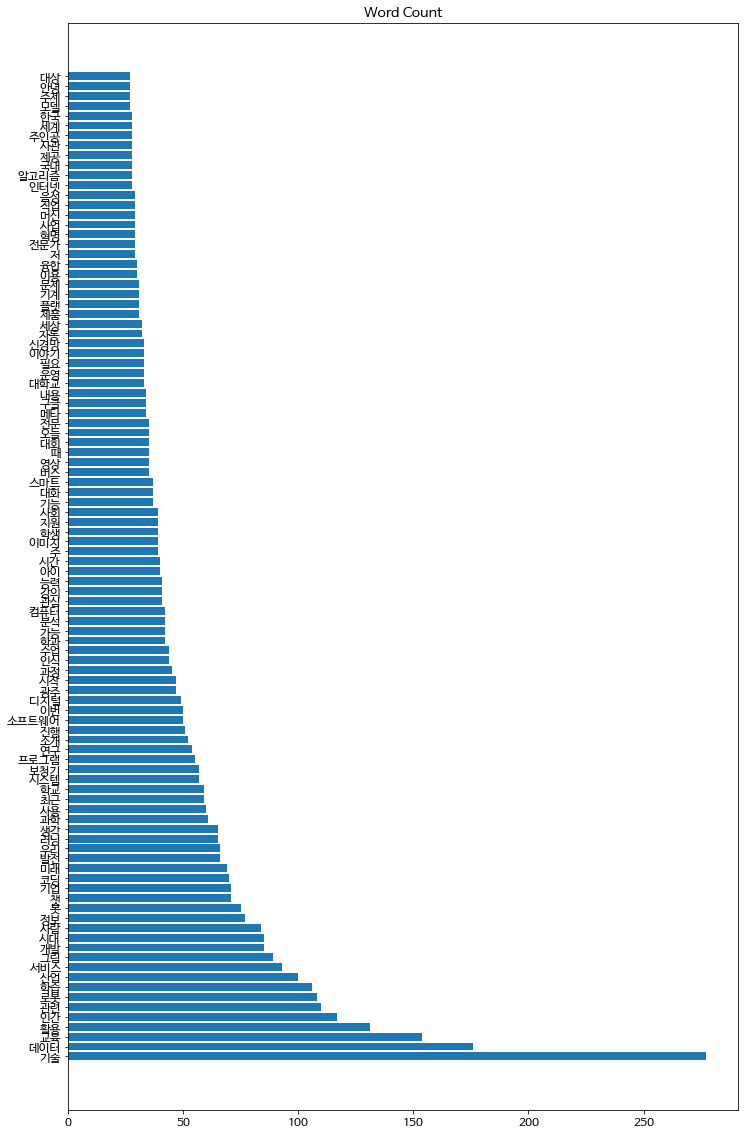

In [58]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12, 20))
plt.barh(y_pos, top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_blog_nouns.keys())
plt.show()

### 트리맵 시각화

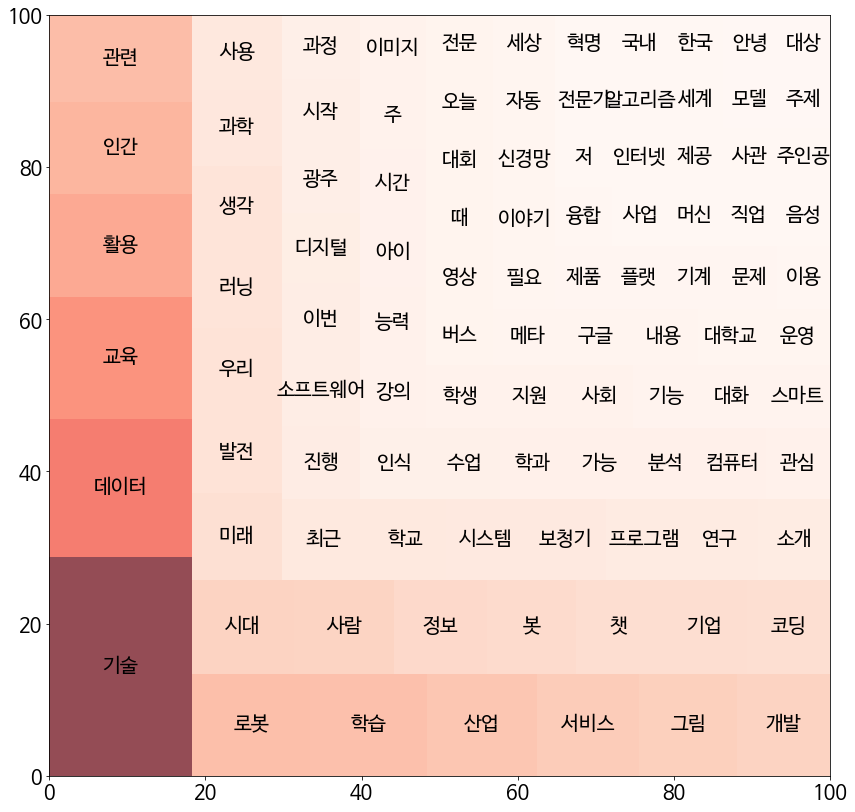

In [59]:
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_blog_nouns.values()),
                            vmax = max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label = top_blog_nouns.keys(),
              sizes = top_blog_nouns.values(),
              color = colors,
              alpha = .7)

### 워드클라우드 시각화

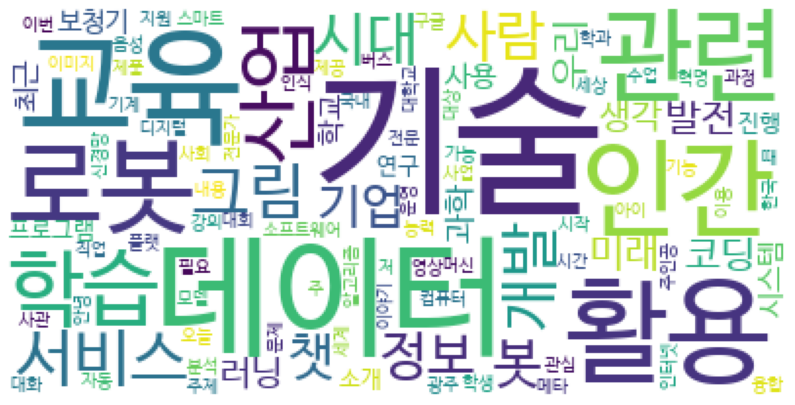

In [60]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()